In [5]:
%matplotlib inline

In [6]:
import supervisely_lib as sly
import json
import matplotlib.pyplot as plt

In [2]:
project_path = '/workdir/demo_data/lemons_annotated'

In [3]:
project = sly.Project(project_path, sly.OpenMode.READ)
print(project.meta)

ProjectMeta:

Object Classes:
Name:  lemon     Shape: Bitmap       Color: [81, 198, 170]
Name:  kiwi      Shape: Bitmap       Color: [255, 0, 0]

Image Tags
Tag Metas:
Empty

Object Tags
Tag Metas:
Empty




In [4]:
dataset_names = project.datasets.keys()
print("Project {!r} consists of {} datasets: {}".format(project.name, len(dataset_names), dataset_names))

Project 'lemons_annotated' consists of 1 datasets: ['ds1']


Current item 'IMG_1836'
	 image path: '/workdir/demo_data/lemons_annotated/ds1/img/IMG_1836.jpg'
	 annotation path: '/workdir/demo_data/lemons_annotated/ds1/ann/IMG_1836.json'
Current item 'IMG_4451'
	 image path: '/workdir/demo_data/lemons_annotated/ds1/img/IMG_4451.jpg'
	 annotation path: '/workdir/demo_data/lemons_annotated/ds1/ann/IMG_4451.json'
Current item 'IMG_0748'
	 image path: '/workdir/demo_data/lemons_annotated/ds1/img/IMG_0748.jpg'
	 annotation path: '/workdir/demo_data/lemons_annotated/ds1/ann/IMG_0748.json'
Current item 'IMG_8144'
	 image path: '/workdir/demo_data/lemons_annotated/ds1/img/IMG_8144.jpg'
	 annotation path: '/workdir/demo_data/lemons_annotated/ds1/ann/IMG_8144.json'
Current item 'IMG_2084'
	 image path: '/workdir/demo_data/lemons_annotated/ds1/img/IMG_2084.jpg'
	 annotation path: '/workdir/demo_data/lemons_annotated/ds1/ann/IMG_2084.json'
Current item 'IMG_3861'
	 image path: '/workdir/demo_data/lemons_annotated/ds1/img/IMG_3861.jpg'
	 annotation path: '/wo

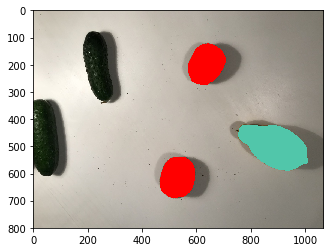

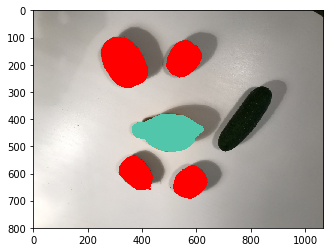

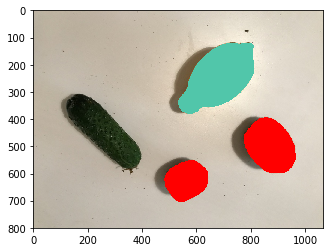

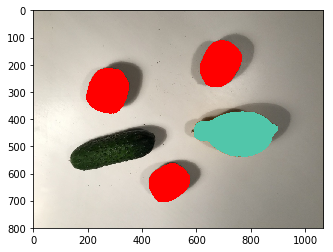

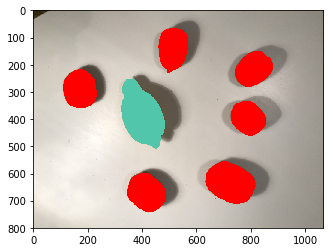

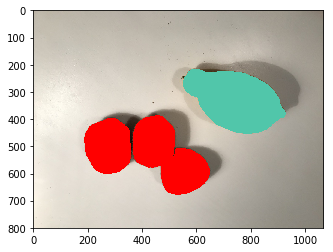

In [8]:
for dataset in project:
    for item_name in dataset:
        img_path, ann_path = dataset.get_item_paths(item_name)
        print("Current item {!r}".format(item_name))
        print("\t image path: {!r}".format(img_path))
        print("\t annotation path: {!r}".format(ann_path))

        img = sly.image.read(img_path)

        with open(ann_path) as json_data:
            ann_json = json.load(json_data)
        ann = sly.Annotation.from_json(ann_json, project.meta)
        
        ann.draw(img)
        plt.figure()
        plt.imshow(img)
    